In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Ashish\\Clustering-Bin-Packing\\src\\main\\resources\\outbound.csv')
df_useful = df.drop(['job_id', 'list_of_vehicle_type', 'nb_of_vehicle', 'nb_of_items_on_job', 'no_of_Artics', 'no_of_vehicles_notArtic', 'abilities'], axis=1)

In [4]:
df_useful.to_csv('C:/Ashish/Clustering-Bin-Packing/src/main/resources/outbound_reduced.csv')

In [5]:
df_final = df_useful.dropna()

print(len(df_final))
print(len(df_useful))
print(len(df_final) - len(df_useful))

16794
17686
-892


In [6]:
df_final.to_csv('C:/Ashish/Clustering-Bin-Packing/src/main/resources/outbound_final.csv')

In [7]:
data_x = []
data_y = []
for i in df_final['collection_geoloc']:
    data_temp = i.strip().split(',')
    #print(data_temp)
    #data_x.append(float(map(float, data_temp[0])))
    #data_y.append(float(map(float, data_temp[1])))
    data_x.append(data_temp[0])
    data_y.append(data_temp[1])

print(len(data_x))
print(len(data_y))
print(type(data_x[0]))
print(type(data_y[0]))
data_x_float = [float(i) for i in data_x]
data_y_float = [float(i) for i in data_y]
print(len(data_x_float))
print(len(data_y_float))
print(type(data_x_float[0]))
print(type(data_y_float[0]))
print(data_x_float[0])
print(data_y_float[0])
data_x[:5]

16794
16794
<class 'str'>
<class 'str'>
16794
16794
<class 'float'>
<class 'float'>
-2.087892399999987
57.12535159999999


['-2.087892399999987',
 '-2.087892399999987',
 '-2.0934305000000677',
 '-2.0934305000000677',
 '-2.0934305000000677']

In [8]:
#print(data_x_float)
#print(data_y_float)

In [9]:
x_array = np.asarray(data_x_float)
y_array = np.asarray(data_y_float)

In [10]:
print(type(x_array))
print(type(y_array))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
X = np.array(list(zip(x_array, y_array)))

In [12]:
X

array([[-2.0878924 , 57.1253516 ],
       [-2.0878924 , 57.1253516 ],
       [-2.0934305 , 57.1898548 ],
       ...,
       [-2.09293524, 57.19762137],
       [-2.09293524, 57.19762137],
       [-2.1534924 , 57.0710743 ]])

In [13]:
from sklearn.cluster import KMeans
#def k_means(X1, n):
# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
C = kmeans.cluster_centers_
    #return C

In [14]:
#c1, kmeans = k_means(X, 2)
print(C)

[[ -2.14027602  57.1593024 ]
 [-79.6677027   42.7837677 ]]


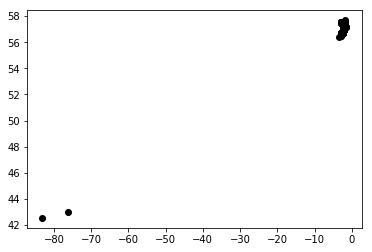

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x_array, y_array, c='black')

In [17]:
cent = np.asarray(C)
print(type(cent))
print(cent[0, :])
print(cent[1, :])

C_x = cent[:, 0]
C_y = cent[:, 1]

<class 'numpy.ndarray'>
[-2.14027602 57.1593024 ]
[-79.6677027  42.7837677]


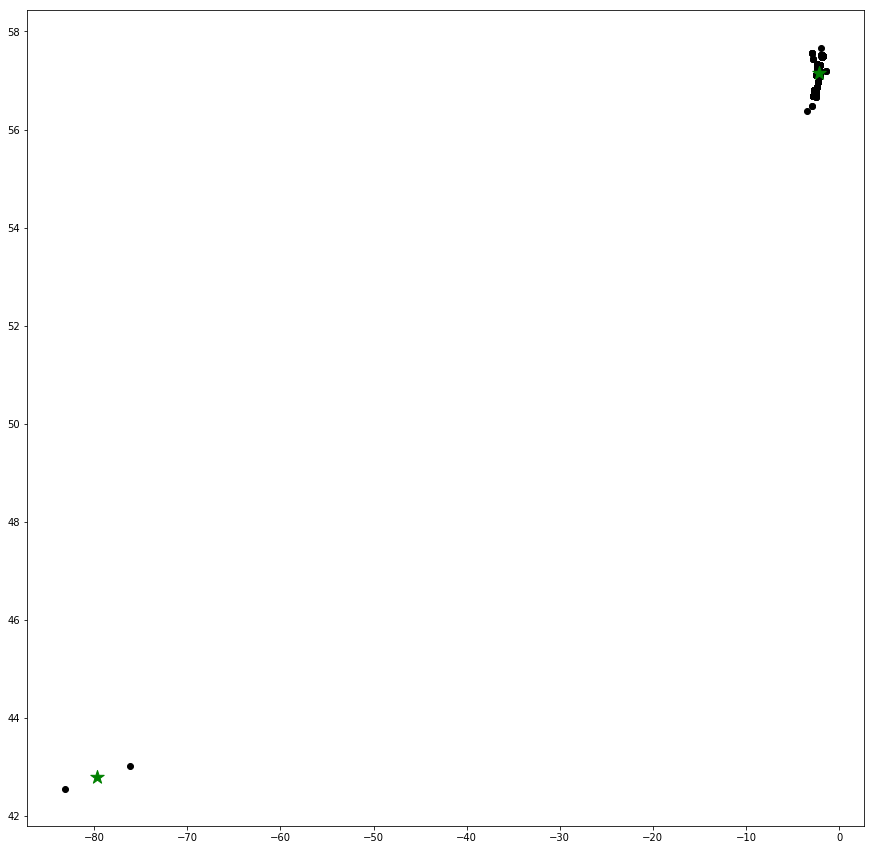

In [18]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(x_array, y_array, c='black')
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [19]:
d = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
d1 = {i: X[np.where(kmeans.labels_ == i)] for i in range(kmeans.n_clusters)}

In [20]:
print(d)
d1

{0: array([    0,     1,     2, ..., 16791, 16792, 16793], dtype=int64), 1: array([13475, 14610], dtype=int64)}


{0: array([[-2.0878924 , 57.1253516 ],
        [-2.0878924 , 57.1253516 ],
        [-2.0934305 , 57.1898548 ],
        ...,
        [-2.09293524, 57.19762137],
        [-2.09293524, 57.19762137],
        [-2.1534924 , 57.0710743 ]]), 1: array([[-83.1396436,  42.5528914],
        [-76.1957618,  43.014644 ]])}

In [21]:
print(d)
print(x_array)
print(y_array)

{0: array([    0,     1,     2, ..., 16791, 16792, 16793], dtype=int64), 1: array([13475, 14610], dtype=int64)}
[-2.0878924  -2.0878924  -2.0934305  ... -2.09293524 -2.09293524
 -2.1534924 ]
[57.1253516  57.1253516  57.1898548  ... 57.19762137 57.19762137
 57.0710743 ]


In [22]:
new_x = []
new_y = []
for i in range(0, len(x_array)):
    if (i == 13475 or i == 14610):
        print("hi")
    else:
        new_x.append(x_array[i])
        
for i in range(0, len(y_array)):
    if (i == 13475 or i == 14610):
        print("hi")
    else:
        new_y.append(y_array[i])

hi
hi
hi
hi


In [23]:
#print(new_x)
#print(new_y)

In [24]:
XA = np.array(list(zip(new_x, new_y)))

In [25]:
XA

array([[-2.0878924 , 57.1253516 ],
       [-2.0878924 , 57.1253516 ],
       [-2.0934305 , 57.1898548 ],
       ...,
       [-2.09293524, 57.19762137],
       [-2.09293524, 57.19762137],
       [-2.1534924 , 57.0710743 ]])

In [26]:
print(len(X))
print(len(XA))
print(type(XA[0][0]))

16794
16792
<class 'numpy.float64'>


In [27]:
from sklearn.cluster import KMeans
#def k_means(X1, n):
# Number of clusters
kmeans = KMeans(n_clusters=7)
# Fitting the input data
kmeans = kmeans.fit(XA)
# Getting the cluster labels
labels = kmeans.predict(XA)
# Centroid values
CA = kmeans.cluster_centers_
    #return C

In [28]:
print(CA)

[[-1.78752142 57.50677543]
 [-2.1515534  57.06853462]
 [-2.46253723 56.72476846]
 [-2.2150587  57.20134127]
 [-2.41831155 57.13276487]
 [-2.0847458  57.12824159]
 [-2.66283282 56.79152175]]


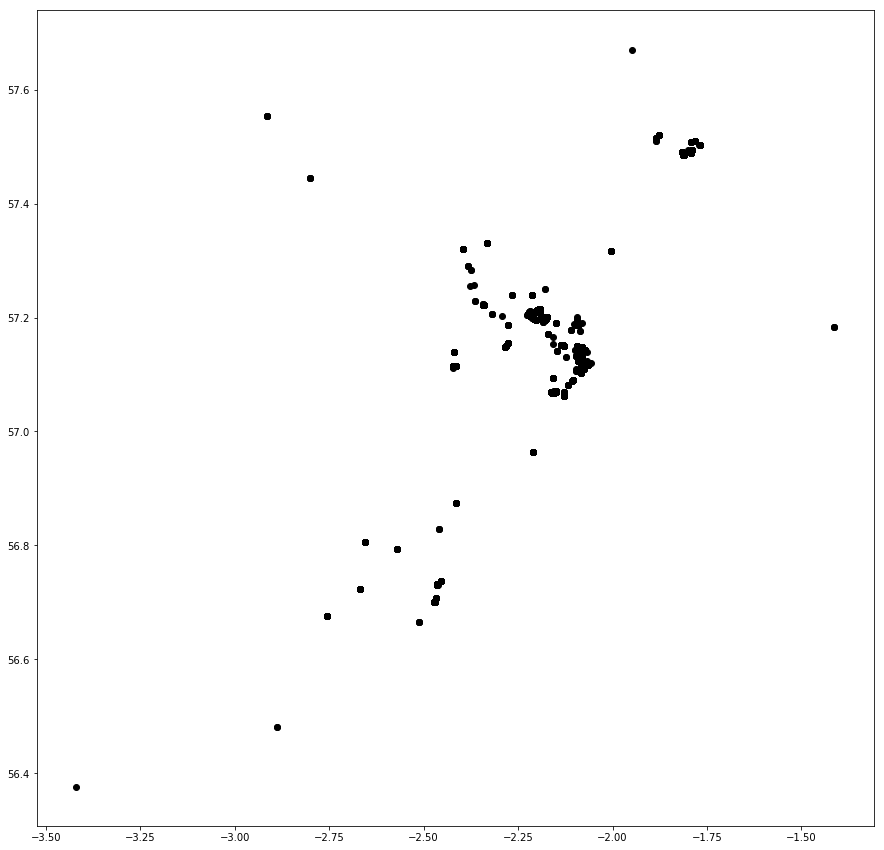

In [29]:
x_arrayA = np.asarray(new_x)
y_arrayA = np.asarray(new_y)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(x_arrayA, y_arrayA, c='black')

In [30]:
centA = np.asarray(CA)
print(type(centA))
print(centA[0, :])
print(centA[1, :])

C_xA = centA[:, 0]
C_yA = centA[:, 1]

<class 'numpy.ndarray'>
[-1.78752142 57.50677543]
[-2.1515534  57.06853462]


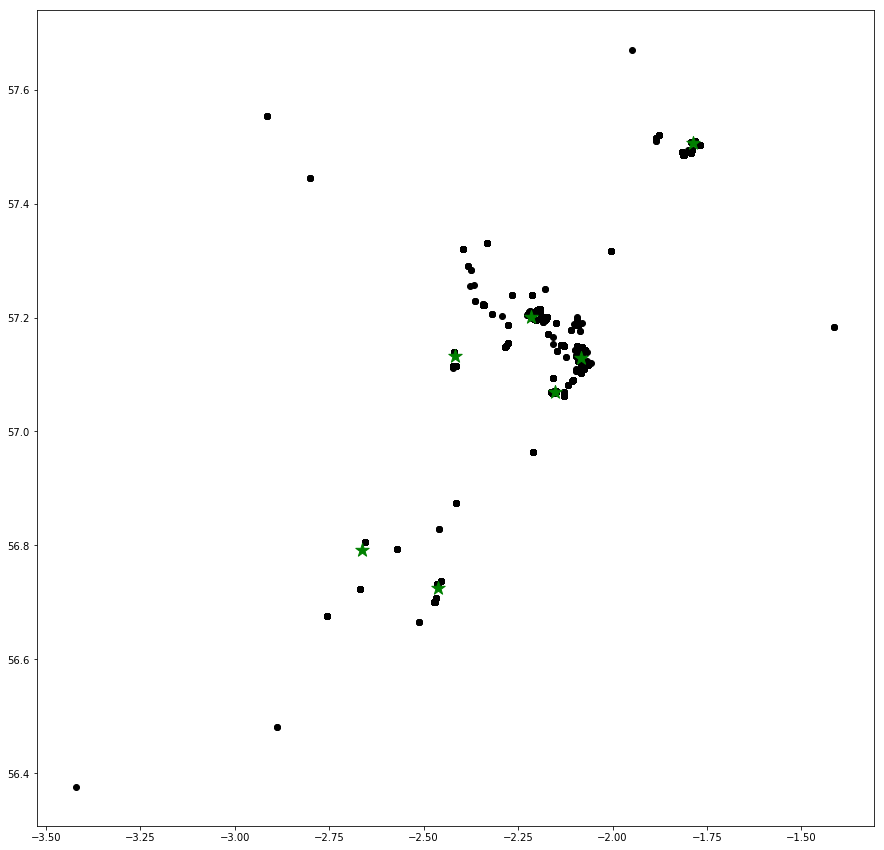

In [33]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(x_arrayA, y_arrayA, c='black')
plt.scatter(C_xA, C_yA, marker='*', s=200, c='g')